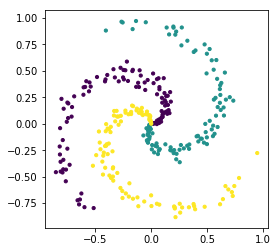

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import time

#insert dimension and data set size
N = 100 #per class data set size
D = 2
C = 3

X = np.zeros((N*C, D))
y = np.zeros(N*C, dtype = 'uint8')

for i in range(C) : 
    ix = range(N*i, N*(i+1))
    r = np.linspace(0,1,N)
    theta = np.linspace(i*4, (i+1)*4, N) + np.random.randn(N)*0.2
    X[ix] = np.c_[r*np.cos(theta), r*np.sin(theta)]
    y[ix] = i

plt.figure(figsize = (4,4))    
plt.scatter(X[:,0], X[:,1], c = y , s = 10)
plt.show()


In [79]:
def f(X,Y, W1,b1,W2,b2) :
    n = X.shape[0]
    X = X.ravel()
    Y = Y.ravel()
    Z = np.c_[X,Y]
    M = np.maximum(0, np.dot(Z,W1) + b1)
    scores = np.dot(M,W2) + b2
    score =  np.argmax(scores, axis = 1)
    return score.reshape(n,n)

iteration 0/ 10000
iteration 1000/ 10000
iteration 2000/ 10000
iteration 3000/ 10000
iteration 4000/ 10000
iteration 5000/ 10000
iteration 6000/ 10000
iteration 7000/ 10000
iteration 8000/ 10000
iteration 9000/ 10000
traning accuracy : 0.993333


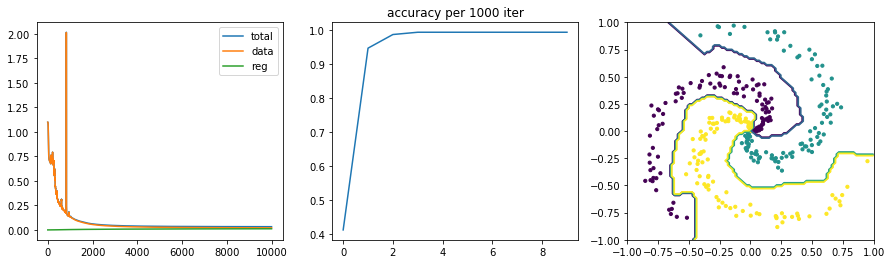

In [96]:
# two layer neural net

H = 100 
W1 = np.random.randn(D,H)*0.01
b1 = np.zeros((1,H))
W2 = np.random.randn(H,C)*0.01
b2 = np.zeros((1,C))

# hyperparameter
reg = 0.00001
iter = 10000
learning_rate = 1

n = X.shape[0]
tictoc = time.time()
loss_history = []
dataloss_his = []
regloss_his = []
acc_history = []

for i in range(iter) :
    M = np.maximum(0, np.dot(X,W1) + b1)
    scores = np.dot(M,W2) + b2
    output = np.exp(scores)/ np.sum(np.exp(scores),axis = 1, keepdims = True)
    
    y_c = np.zeros((n, C)) 
    y_c[np.arange(n), y] = 1 
    
    data_loss = np.sum(-np.log(output[np.arange(n), y]))/n
    reg_loss = reg*(np.sum(W1*W1)+np.sum(W2*W2))
    loss = data_loss + reg_loss
    
    loss_history.append(loss)
    dataloss_his.append(data_loss)
    regloss_his.append(reg_loss)
    
    if i %1000 == 0:
        print("iteration %d/ %d" %(i, iter))
        #print("total loss : %f" %loss)
        acc_history.append((y == np.argmax(scores,axis = 1)).mean())

    dW2 = (M.T).dot(output-y_c)/n
    db2 = np.ones((1,n)).dot(output-y_c)/n
    dM = (output-y_c).dot(W2.T)/n
    dM = dM*(M>0)
    dW1 = np.dot(X.T, dM)
    db1 = np.ones((1,n)).dot(dM)
    
    dW2 += 2*reg*W2
    dW1 += 2*reg*W1
    
    W2 -= learning_rate*dW2
    b2 -= learning_rate*db2
    W1 -= learning_rate*dW1
    b1 -= learning_rate*db1

    
# Printing
M = np.maximum(0, np.dot(X,W1) + b1)
scores = np.dot(M,W2) + b2
accuracy = (y == np.argmax(scores,axis = 1)).mean()

print("traning accuracy : %f" %accuracy)

plt.figure(figsize = (15,4))

plt.subplot(1,3,1)
plt.plot(loss_history, label = 'total')
plt.plot(dataloss_his, label = 'data')
plt.plot(regloss_his, label = 'reg')
plt.legend()

plt.subplot(1,3,2)
plt.plot(acc_history)
plt.title('accuracy per 1000 iter')

plt.subplot(1,3,3)
plt.scatter(X[:,0], X[:,1], c = y , s = 10)

x = np.linspace(-1,1,100)
y1 = np.linspace(-1,1,100)
X1,Y1 = np.meshgrid(x,y1)
Z = f(X1,Y1, W1,b1,W2,b2)

plt.contour(X1,Y1,Z)
plt.show()        
        
